In [1]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력 default:20
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 10)  # None으로 설정하면 모든 행 출력 default:50
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력 default:60

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [4]:
# 정규표현식
import re

In [5]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [6]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-07 09:44:19.760172


'2025-01-07'

In [7]:
df = pd.read_csv(f'news_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓","\n 사진 확대 삼성SDI 기흥사업장. [사진 = 삼성SDI] DS투자증권은 7일 삼성SDI에 대해 지난해 4분기 일회성 비용이 반영되면서 영업손실이 예상된다며 목표주가를 기존 52만원에서 39만원으로 하향 조정했다. 다만 투자의견은 ‘매수’를 유지했다.삼성SDI의 4분기 영업손실은 233억원으로 전년동기대비 적자전환하며 컨센서스(증권사 전망치 평균)를 하회할 것으로 전망했다. 같은 기간 매출액은 31.8% 감소한 3조8000억원으로 추정했다.중대형전지는 주요 고객사 부진으로 전분기 수준의 드론·친환경차(xEV) 출하량이 예상된다고 설명했다. 에너지저장장치(ESS) 호조는 지속돼 중대형전지 출하량 성장을 견인할 것으로 봤다. 소형전지는 리비안 물량 부재 외에도 전동공구와 IT향도 부진하며 출하량이 감소할 것으로 예상했다.여기에 일회성 비용 인식으로 중대형전지를 중심으로 마진율을 하향했다는 설명이다. 일회성 비용은 재고평가손실과 품질충당보증금 설정 등에 따라 약 1000억원 발생할 것으로 전망했다.삼성SDI의 고객사인 리비안이 올해 미국 인플레이션감축법(IRA) 보조금 대상 차종에서 제외된 점도 부담 요인으로 꼽았다. 3750달러 보조금의 부재는 리비안의 가격 경쟁력에 큰 부담이 될 전망이다. 원통형 전지 주 고객사가 리비안인 점을 감안하면 소형전지 출하량 회복이 지연될 수밖에 없다고 짚었다.최태용 DS투자증권 연구원은 “소형전지 중심으로 가동률 회복이 지연된 점을 반영해 실적 추정치를 하향했다”며 “트럼프 대통령 당선으로 업황 위축이 가시화하고 있다”고 말했다.최 연구원은 “첨단제조생산세액공제(AMPC)를 포함한 IRA 보조금 폐지 가능성은 불확실하지만, 예산 감축을 위한 보조금 축소는 예상 가능한 범위”라며 “전방 시장 둔화는 불가피하나 경쟁사 대비 AMPC 의존도가 낮은 점은 오히려 장점으로 부각될 수 있다”고 덧붙였다.\n",2025-01-07 08:25:11


In [8]:
df.shape

(100, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사     100 non-null    object
 1   제목      100 non-null    object
 2   내용      100 non-null    object
 3   작성일시    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [10]:
df.describe()

,언론사,제목,내용,작성일시
count,100,100,100,100
unique,2,100,100,97
top,매일경제,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓","\n 사진 확대 삼성SDI 기흥사업장. [사진 = 삼성SDI] DS투자증권은 7일 삼성SDI에 대해 지난해 4분기 일회성 비용이 반영되면서 영업손실이 예상된다며 목표주가를 기존 52만원에서 39만원으로 하향 조정했다. 다만 투자의견은 ‘매수’를 유지했다.삼성SDI의 4분기 영업손실은 233억원으로 전년동기대비 적자전환하며 컨센서스(증권사 전망치 평균)를 하회할 것으로 전망했다. 같은 기간 매출액은 31.8% 감소한 3조8000억원으로 추정했다.중대형전지는 주요 고객사 부진으로 전분기 수준의 드론·친환경차(xEV) 출하량이 예상된다고 설명했다. 에너지저장장치(ESS) 호조는 지속돼 중대형전지 출하량 성장을 견인할 것으로 봤다. 소형전지는 리비안 물량 부재 외에도 전동공구와 IT향도 부진하며 출하량이 감소할 것으로 예상했다.여기에 일회성 비용 인식으로 중대형전지를 중심으로 마진율을 하향했다는 설명이다. 일회성 비용은 재고평가손실과 품질충당보증금 설정 등에 따라 약 1000억원 발생할 것으로 전망했다.삼성SDI의 고객사인 리비안이 올해 미국 인플레이션감축법(IRA) 보조금 대상 차종에서 제외된 점도 부담 요인으로 꼽았다. 3750달러 보조금의 부재는 리비안의 가격 경쟁력에 큰 부담이 될 전망이다. 원통형 전지 주 고객사가 리비안인 점을 감안하면 소형전지 출하량 회복이 지연될 수밖에 없다고 짚었다.최태용 DS투자증권 연구원은 “소형전지 중심으로 가동률 회복이 지연된 점을 반영해 실적 추정치를 하향했다”며 “트럼프 대통령 당선으로 업황 위축이 가시화하고 있다”고 말했다.최 연구원은 “첨단제조생산세액공제(AMPC)를 포함한 IRA 보조금 폐지 가능성은 불확실하지만, 예산 감축을 위한 보조금 축소는 예상 가능한 범위”라며 “전방 시장 둔화는 불가피하나 경쟁사 대비 AMPC 의존도가 낮은 점은 오히려 장점으로 부각될 수 있다”고 덧붙였다.\n",2025-01-06 17:36:35
freq,50,1,1,2


In [11]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
# 중복행만선택
df[df.duplicated()]

,언론사,제목,내용,작성일시


In [14]:
df['언론사'].value_counts()

언론사
매일경제    50
한국경제    50
Name: count, dtype: int64

#### 텍스트 길이 분석

In [15]:
# 제목,내용 길이
df['제목_길이'] = df['제목'].str.len()
df['내용_길이'] = df['내용'].str.len()

In [16]:
# 제목,내용 토큰 개수
df['제목_토큰_개수']=df['제목'].str.split().str.len()
df['내용_토큰_개수']=df['내용'].str.split().str.len()

In [17]:
df[['제목_길이','제목_토큰_개수','내용_길이','내용_토큰_개수']].describe()

,제목_길이,제목_토큰_개수,내용_길이,내용_토큰_개수
count,100.000000,100.000000,100.000000,100.000000
mean,33.590000,7.190000,1187.820000,239.010000
std,7.990013,1.762087,1001.896912,207.725124
min,12.000000,4.000000,51.000000,7.000000
25%,28.750000,6.000000,713.750000,139.250000
50%,34.000000,7.000000,1032.000000,203.500000
75%,38.000000,8.000000,1422.000000,275.000000
max,65.000000,15.000000,9131.000000,1842.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_개수  100 non-null    int64 
 7   내용_토큰_개수  100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


array([[<Axes: title={'center': '제목_길이'}>,
        <Axes: title={'center': '내용_길이'}>],
       [<Axes: title={'center': '제목_토큰_개수'}>,
        <Axes: title={'center': '내용_토큰_개수'}>]], dtype=object)

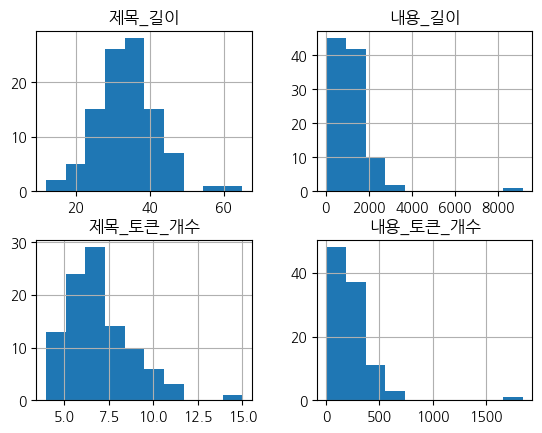

In [19]:
df.hist(bins=10)

In [20]:
df[df['제목_길이'] == df['제목_길이'].max()]

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수
47,매일경제,"[MK시그널] 유니드, 트럼프 2기 탄소포집 시장 확대 전망에 주가 상승세…MK시그널 추천 후 상승률 6.17% 기록","\n 사진 확대 1월 4일 유니드(014830)가 강세다. 전일 유니드 주가는 종가 기준 0.42% 상승한 71,400원에 마감했다.현재는 74,900원으로 (9시 39분 기준) 전일 종가 대비 4.90% 상승한 상태를 보이고 있다.MK시그널은 유니드를 AI 2호를 통해 24년 12월 20일 매수 추천했으며, 목표가 및 손절가 도달 전 보유 전략에 의해 4.86%의 평가손익 수익률을 기록하고 있다.(MK시그널의 투자전략에 따른 수익 성과는 투자자별로 상이할 수 있습니다.)인공지능이 선정한 포트폴리오 AI 2호는 컨센서스가 상향된 든든한 실적 우량주로 포트폴리오 구성이 되어 있으며, 펀더멘탈, 수급 등 우량한 종목 대상 투자전략 시그널을 제공하고 있다.포트폴리오 편입 후 최대 보유 기간은 10일, 목표가 20%, 손절가 10% 원칙으로 편출 전략을 가져가고 있다.유니드(014830)는 트럼프 2기 핵심 정책인 원유, 가스 생산량 확대를 위해 이산화탄소를 줄이기 위해 중요한 탄소포집(CCUS) 기술을 가지고 있어 주가가 상승하는 것으로 보인다.CCUS는 화석연료 사용 과정에서 배출되는 이산화탄소를 포집해서 저장(CCS)하거나 활용(CCU)하는 기술이다.MK시그널 현재 ‘첫 달 무료 이벤트’ 진행중!국내 주식과 더불어 미국 주식까지 한 번에! 빅데이터 알고리즘 AI의 추천 종목 매매 신호 받아보세요!인공지능(AI) 기반 매매신호 제공 앱 MK시그널이 뜨거운 성원에 힘입어, 6월 30일까지 고객 감사 할인 이벤트를 진행합니다! 회원가입 시 첫 달 무료 혜택과 함께 평생 최대 50% 할인을 제공합니다.구글 플레이스토어와 애플 앱스토어에서 앱을 다운로드하고 회원가입 한 모든 회원이 참여할 수 있습니다.이번 기회를 놓치지 말고 MK시그널과 함께 스마트하고 성공적인 투자를 시작하세요!▶MK시그널 한 달 무료체험하기 (클릭)◀▶MK시그널 iOS 버전 바로 다운받기 (클릭)◀▶MK시그널 안드로이드 버전 다운받기 (클릭)◀HOT 종목 : 아톤 케이씨에스 아이씨티케이 쏠리드 레인보우로보틱스 셀바스AI 로보티즈\n",2025-01-06 10:34:31,65,1025,15,215


#### 워드클라우드 시각화
- https://github.com/amueller/word_cloud

In [21]:
# 제목을 하나의 문자열로 만들기
news_title = ' '.join(df['제목'])
news_title[:100]

'“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓ “수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑ “휠라홀딩스, 부진은 지난해까지만'

In [22]:
WordCloud?

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

In [23]:
def display_word_cloud(str, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','한국','증시']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

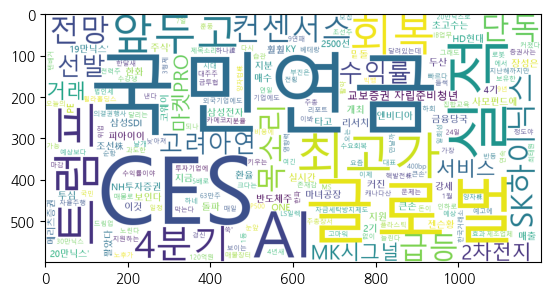

In [24]:
display_word_cloud(news_title,200)

In [25]:
tmp_str = ''.join(df[df['제목'].str.contains('제주항공')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [26]:
tmp_word_cloud.words_

NameError: name 'tmp_word_cloud' is not defined

In [27]:
tmp_str = ''.join(df[df['제목'].str.contains('이마트')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,100)

ValueError: We need at least 1 word to plot a word cloud, got 0.

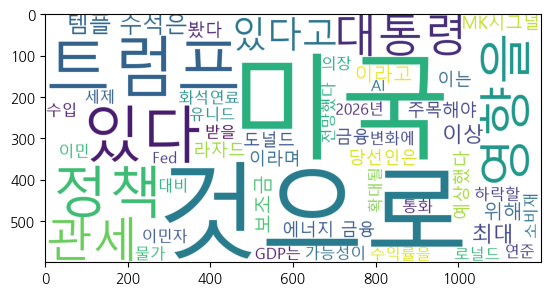

In [28]:
tmp_str = ''.join(df[df['제목'].str.contains('트럼프')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

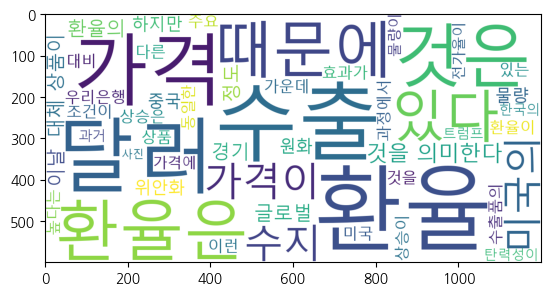

In [29]:
tmp_str = ''.join(df[df['제목'].str.contains('환율')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

#### 형태소 분석기로 특정 품사만 추출하기

In [30]:
#!pip install pecab

In [31]:
from pecab import PeCab
pecab = PeCab()


In [32]:
dir(pecab)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_tokenize',
 'morphs',
 'nouns',
 'pos',
 'postprocessor',
 'tokenizer']

In [33]:
text = '아버지가 방에 들어가신다'

In [34]:
print(pecab.morphs(text))
print(pecab.nouns(text))
print(pecab.pos(text))
# print(pecab.postprocessor)
# print(pecab.tokenizer(text))

['아버지', '가', '방', '에', '들어가', '신다']
['아버지', '방']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]


In [35]:
pecab.nouns('아버지가 방에 들어가신다 주말 여행 영남권')

['아버지', '방', '주말', '여행', '영남']

In [36]:
# 처리시간이 걸리는 작업의 진행률을 시각화해줌
from tqdm import tqdm
tqdm.pandas()

In [37]:
df['제목_명사'] = df['제목'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████| 100/100 [00:02<00:00, 45.93it/s]


In [38]:
# df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

### JDK 설치
1. 최신 버전의 JAVA(JDK)를 설치
2. JAVA_HOME 환경변수를 추가
3. path 환경변수에 %JAVA_HOME%\bin; 추가

### konlpy 설치   
- pip install --upgrade pip
- pip install JPype1   (java,python 연계 역할)
- pip install konlpy --upgrade
- https://konlpy.org/ko/latest/install/

In [39]:
# !pip install --upgrade pip
# !pip install JPype1 (java,python 연계 역할)
# !pip install konlpy --upgrade

In [40]:
from konlpy.tag import Okt
okt = Okt()

In [41]:
txt = '아버지 방에 들어가신다'
okt.morphs(txt)

['아버지', '방', '에', '들어가신다']

In [42]:
okt.pos(txt)

[('아버지', 'Noun'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [43]:
okt.nouns(txt)

['아버지', '방']

In [44]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


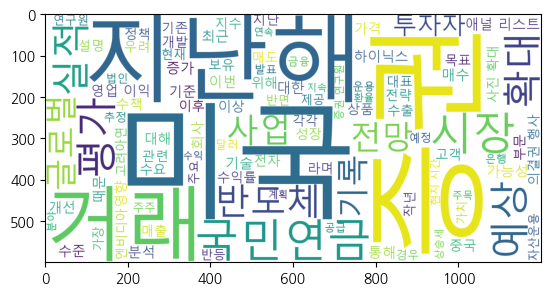

In [45]:
str = ''.join(df['내용_명사'])
dwc = display_word_cloud(str,100)

In [46]:
tmp = df.loc[df[df['내용_명사'].str.contains('테슬라')].index].head(1)['내용'].values[0]
tmp

'\n캐나다하면 떠오르는 두 회사는 세계적인 요가복 브랜드 룰루레몬과 커피 체인점 팀홀튼이었다. 최근 월스트리트에선 여기에 카메코(티커명 CCJ)를 추가하려 한다. 카메코는 원자력 발전에 필요한 우라늄을 공급하는 기업으로, 최근 5년 주가 상승률이 487%에 달한다. 미국 대표 빅테크들의 주가 수익률을 능가하는 것은 최근 인공지능(AI) ‘빅뱅’으로 인해 원전의 필요성이 점점 커지고 있기 때문이다.테슬라 처럼 텐배거 노리는 캐나다 AI원전株      사진 확대    원자력 발전소 모습.(사진=매경)  미국과 캐나다, 카자흐스탄에 우라늄 광산을 보유한 카메코는 코로나 시절(2020~2021년) 적자를 기록하며 고전했다. 마이크로소프트와 오픈AI가 촉발한 AI의 급성장은 원자력 발전처럼 고효율 에너지를 많이 필요로 하게 됐다. 당연히 세계 최대 우라늄 공급사인 카메코의 실적도 살아나기 시작한다.\n'

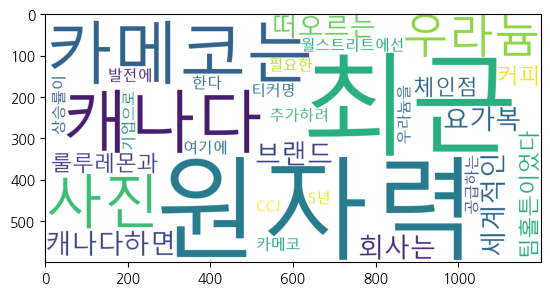

In [47]:
display_word_cloud(tmp,30)

In [48]:
len(okt.pos(tmp))

180

In [49]:
# 중복된 어휘 제거
unique_words = []
pos_list = []
for word, tag in okt.pos(tmp) :
    if word not in unique_words:
        unique_words.append(word)
        pos_list.append(tag)
len(unique_words)        
for item in zip(unique_words,pos_list) :
    print(item[0], item[1])


 Foreign
캐나다 Noun
하면 Verb
떠오르는 Verb
두 Noun
회사 Noun
는 Josa
세계 Noun
적 Suffix
인 Josa
요가복 Noun
브랜드 Noun
룰루 Noun
레몬 Noun
과 Josa
커피 Noun
체인점 Noun
팀홀튼 Noun
이었다 Verb
. Punctuation
최근 Noun
월스트리트 Noun
에선 Josa
여기 Noun
에 Josa
카메코 Noun
( Punctuation
티 Noun
커 Verb
명 Noun
CCJ Alpha
) Punctuation
를 Noun
추가 Noun
하려 Verb
한다 Verb
원자력 Noun
발전 Noun
필요한 Adjective
우라늄 Noun
을 Josa
공급 Noun
하는 Verb
기업 Noun
으로 Josa
, Punctuation
5년 Number
주가 Noun
상 Noun
승률 Noun
이 Josa
487% Number
달 Noun
한 Josa
다 Adverb
미국 Noun
대표 Noun
빅 Noun
테크 Noun
들 Suffix
의 Josa
수익률 Noun
능가 Noun
것 Noun
은 Josa
인공 Noun
지능 Noun
AI Alpha
‘ Foreign
빅뱅 Noun
’ Punctuation
인해 Adjective
원전 Noun
필요성 Noun
점점 Noun
커지고 Verb
있기 Adjective
때문 Noun
이다 Josa
테슬라 Noun
처럼 Noun
텐배거 Noun
노리는 Verb
株 Foreign
사진 Noun
확대 Noun
발전소 Noun
모습 Noun
.( Punctuation
= Punctuation
매경 Noun
카자흐스탄 Noun
광산 Noun
보유 Noun
코로나 Noun
시절 Noun
2020~2021년 Number
적자 Noun
기록 Noun
하며 Verb
고전 Noun
했다 Verb
마이크로소프트 Noun
와 Josa
오픈 Noun
가 Verb
촉발 Noun
급성 Noun
장 Suffix
고 Modifier
효율 Noun
에너지 Noun
많이

In [50]:
df.columns

Index(['언론사', '제목', '내용', '작성일시', '제목_길이', '내용_길이', '제목_토큰_개수', '내용_토큰_개수',
       '제목_명사', '내용_명사'],
      dtype='object')

In [51]:
df.to_csv(f'news_preprocessed_{today}.csv', index=False)